
# Project: Analysis of TMDB-data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The dataset contains information about around 10000 movies from the years 1960-2015. The dataset was first provided by Kaggle, but the cleaned version I'm working with is updated by Udacity. The data contains information on for example the budget, revenue, average rating etc,. My task is to find out if there are any variables that may affect the profit of a movie. I will look at budget, average rating and release year. I will also filter the dataset so I only keep the movies with a higher than average profit, and comparing that dataframe to the whole dataset.

Questions:

(1) What variables may affect the profit of a movie?

(2) Are there any differences in the variables that affect the profits of movies with higher than average profits?

In [144]:
# Importing the packages I will use.

import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df_tmdb = pd.read_csv('C:/Users/Alex/Downloads/tmdb-movies.csv')

pd.set_option('display.max_columns', None)

df_tmdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Missing values in some columns. Does it matter? Since I don't need the columns with the missing values for my analysis, I will keep them.

In [17]:
(df_tmdb == 0).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
profit                  4705
dtype: int64

There are a lot of rows with "0" in the budget and revenue columns. I will drop them to not skew the data.

In [4]:
df_tmdb.shape

(10866, 21)

In [5]:
duplicates = df_tmdb[df_tmdb.duplicated()]
duplicates

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Only one duplicated row, so it doesn't really matter if we keep it or not. But I will remove it.


### Data Cleaning 

I'm dropping the duplicated row and keeping all the columns. The columns I'll look at are already cleaned and doesn't need much further work. I'm also adding a column that contains the profit for each movie. I will also filter the dataframe so I have another dataframe that contains the movies with higher than average profits. I will later compare that dataframe to the whole dataset. I will also drop the rows that only contain "0" in both the budget and revenue column.

In [10]:
df_tmdb.drop_duplicates(inplace=True)


Dropping the duplicated value above.

In [21]:
df_tmdb['profit'] = df_tmdb['revenue_adj'] - df_tmdb['budget_adj']

Adding a column that contains the profit for each movie.

In [24]:
profits_over_average = df_tmdb.query('profit > 3.381332e+07') 

Filtering the dataframe.

In [25]:
df_tmdb.drop(df_tmdb[df_tmdb['budget_adj'] == 0].index, inplace = True) 

In [26]:
df_tmdb.drop(df_tmdb[df_tmdb['revenue_adj'] == 0].index, inplace = True) 

Dropping the rows that contain "0".

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What variables may affect the profits of a movie?)

### Research Question 2 (Are there any differences in the variables that affect the profits of movies with higher than average profits?)

Let's start by looking at descriptive statistics of the whole dataset.


In [22]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08,9.282470e+07
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08,1.940715e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07,-1.504995e+06
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07,2.737064e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08,1.074548e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [171]:
df_tmdb.count()['id']

3854

Descriptive statistics for the movies with profits higher than average.

In [48]:
profits_over_average.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1810.000000,1810.000000,1.810000e+03,1.810000e+03,1810.000000,1810.000000,1810.000000,1810.000000,1.810000e+03,1.810000e+03,1.810000e+03
mean,34879.710497,1.732842,5.034784e+07,2.027701e+08,112.820994,895.664088,6.383425,1999.755801,5.952923e+07,2.601092e+08,2.005800e+08
std,64456.423745,1.909234,4.965375e+07,2.201255e+08,21.055299,1127.578859,0.730404,12.542555,5.063134e+07,2.642936e+08,2.401894e+08
min,11.000000,0.010335,1.130000e+02,7.000000e+06,26.000000,10.000000,3.400000,1960.000000,2.248029e+02,3.602000e+07,3.382138e+07
25%,1859.750000,0.767787,1.500000e+07,7.496423e+07,97.000000,204.000000,5.900000,1993.000000,2.299264e+07,9.941096e+07,6.345346e+07
50%,9734.000000,1.240707,3.500000e+07,1.303263e+08,109.000000,498.500000,6.400000,2003.000000,4.326677e+07,1.721621e+08,1.171310e+08
75%,27580.500000,2.041917,7.000000e+07,2.437916e+08,124.000000,1094.500000,6.900000,2010.000000,8.131203e+07,3.205632e+08,2.357509e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,248.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


In [170]:
profits_over_average.count()['id']

1810

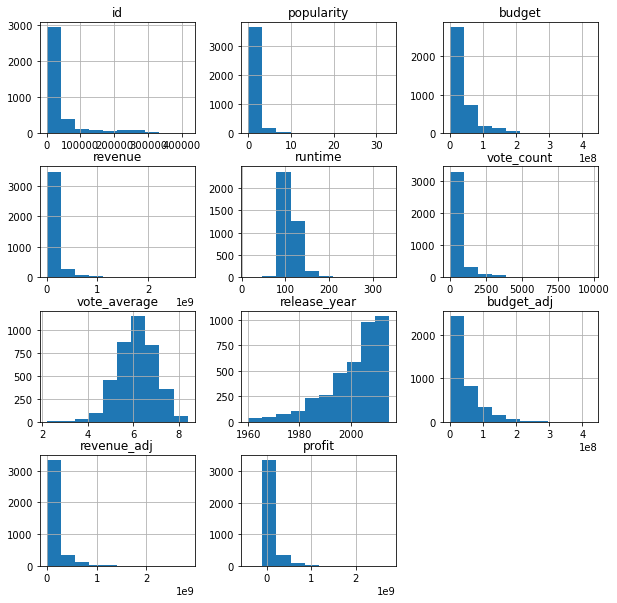

In [33]:
df_tmdb.hist(figsize=(10,10));

What stands out the most when looking at the charts above is "release_year". More and more movies are being made each year.

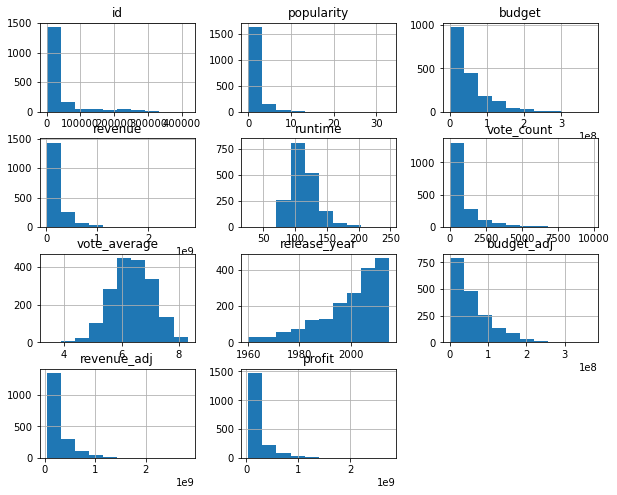

In [196]:
profits_over_average.hist(figsize=(10,8));

The average budget seems slightly higher for movies with above average in profit. Voting average is also slightly higher.

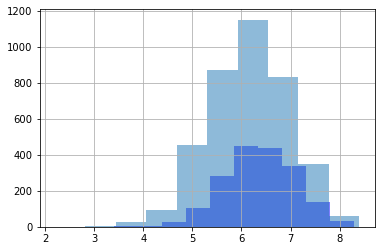

In [203]:
profits_over_average['vote_average'].hist(alpha=0.5, color='blue'), df_tmdb['vote_average'].hist(alpha=0.5);

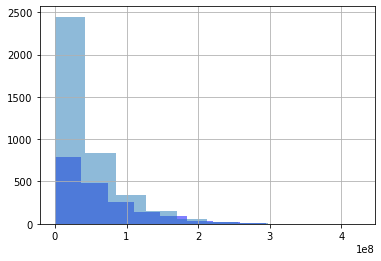

In [205]:
profits_over_average['budget_adj'].hist(alpha=0.5, color='blue'), df_tmdb['budget_adj'].hist(alpha=0.5);

In [121]:
df_tmdb.groupby('release_year')['profit'].mean().sort_values(ascending=False)

release_year
1965    5.526511e+08
1973    4.328721e+08
1975    3.638568e+08
1977    3.301075e+08
1967    3.199669e+08
1969    3.074121e+08
1972    2.980356e+08
1964    2.959526e+08
1970    2.318386e+08
1974    2.213122e+08
1961    2.181770e+08
1978    1.976323e+08
1979    1.784574e+08
1962    1.718493e+08
1976    1.607848e+08
1960    1.595481e+08
1982    1.574585e+08
1971    1.393045e+08
1963    1.369589e+08
1989    1.242996e+08
1968    1.172100e+08
1980    1.152827e+08
1992    1.135624e+08
1994    1.116238e+08
2015    1.094348e+08
1990    1.087903e+08
1983    1.062928e+08
1981    1.055405e+08
2012    9.976430e+07
1995    9.907411e+07
1991    9.760651e+07
1997    9.630338e+07
1993    9.593160e+07
2014    9.309273e+07
1984    9.163009e+07
2003    9.014710e+07
1987    8.963552e+07
2002    8.595209e+07
1985    8.241661e+07
2009    8.218418e+07
2013    8.207319e+07
2001    8.164507e+07
2004    7.713978e+07
1998    7.668696e+07
1996    7.656904e+07
2010    7.495069e+07
1988    7.482564e+07


Looking at the average profit/movie per year above.

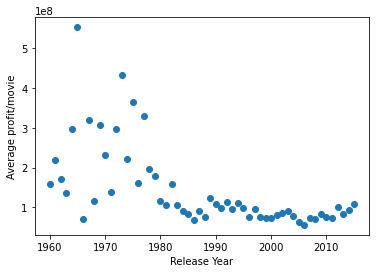

In [190]:
df_tmdb.groupby('release_year')['profit'].mean().sort_values(ascending=False).plot(xlabel='Release Year', ylabel='Average profit/movie', style='o');

It's quite clear that the studios were making more money per movie in the 60s and 70s compared to today. The average profit per movie was higher back then.

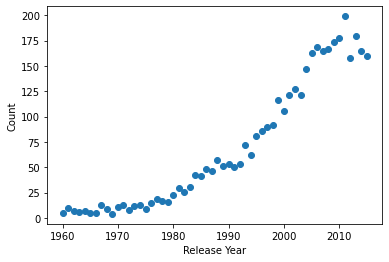

In [206]:
df_tmdb.groupby('release_year').count()['id'].sort_values(ascending=False).plot(xlabel= 'Release Year', ylabel= 'Count', style="o");

Counting the number of movies made per year, more movies were made after year 2000 compared to the 60s and 70s.

In [123]:
df_tmdb.groupby('release_year')['profit'].sum().sort_values(ascending=False)

release_year
2015    1.750957e+10
2012    1.576276e+10
2014    1.536030e+10
2013    1.477317e+10
2011    1.450868e+10
2009    1.430005e+10
2010    1.334122e+10
2007    1.228991e+10
2008    1.199481e+10
2004    1.133955e+10
2002    1.091592e+10
2003    1.090780e+10
2005    1.033877e+10
2001    9.879053e+09
2006    9.438970e+09
1997    8.667305e+09
1999    8.421411e+09
1995    8.025003e+09
2000    7.738026e+09
1998    7.055200e+09
1994    6.920674e+09
1993    6.907075e+09
1996    6.584938e+09
1989    6.339278e+09
1977    6.272042e+09
1992    6.018808e+09
1990    5.765886e+09
1973    5.194465e+09
1991    4.880325e+09
1988    4.265061e+09
1967    4.159569e+09
1987    4.123234e+09
1982    4.093921e+09
1984    3.848464e+09
1985    3.379081e+09
1978    3.359749e+09
1986    3.313068e+09
1983    3.295076e+09
1975    3.274711e+09
1981    3.166215e+09
1974    2.877058e+09
1979    2.855318e+09
1965    2.763256e+09
1980    2.651503e+09
1970    2.550225e+09
1976    2.411772e+09
1972    2.384285e+09


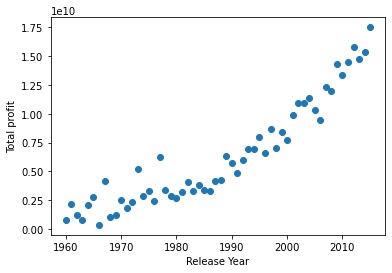

In [130]:
df_tmdb.groupby('release_year')['profit'].sum().sort_values(ascending=False).plot(xlabel='Release Year', ylabel='Total profit',style='o');

Looking at the sum of the profits for all the movies per year, it seems like the strategy of making lots of movies today works profit wise.

In [181]:
df_tmdb[['vote_average','profit']].corr()

,vote_average,profit
vote_average,1.000000,0.288651
profit,0.288651,1.000000


In [182]:
profits_over_average[['vote_average','profit']].corr()

,vote_average,profit
vote_average,1.000000,0.271624
profit,0.271624,1.000000


In [183]:
movies_over_8_in_rating = df_tmdb.query('vote_average > 8')

In [185]:
movies_over_8_in_rating[['vote_average', 'profit']].corr()

,vote_average,profit
vote_average,1.000000,-0.197847
profit,-0.197847,1.000000


The relationship between vote average and profit is slighty positive, but actually negative when we look at movies > 8 in ratings. 

In [211]:
df_tmdb[['budget_adj', 'profit']].corr()

,budget_adj,profit
budget_adj,1.000000,0.404344
profit,0.404344,1.000000


In [213]:
profits_over_average[['budget_adj','profit']].corr()

,budget_adj,profit
budget_adj,1.000000,0.394562
profit,0.394562,1.000000


<a id='conclusions'></a>
## Conclusions

We found out that the average rating doesn't influence the profit that much, and looking at movies with a higher rating (>8) the correlation between average rating and profit is actually negative (-0.2). Also, we found out that more and more movies are being made and the movies have a lower profit/movie compared to the 60s and 70s. The sum of profits per year is generally higher today (after year 2000), so it seems like a conscious decision to make more movies no matter the quality. Back in the 60s and 70s, the quality was probably more important since less movies were made. Today (after year 2000), the quantity of movies being made is a more important factor in terms of profit. The budget is slightly higher for movies with higher than average profits, but the correlation between budget and profit is not different compared to the whole dataset.  